In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#my function
from wb_functions.wb_functions import specific_countries_time_series

In [9]:
inflation = pd.read_csv('data/world-bank/inflation-gdp-deflator-percent.csv', skiprows=3)

In [10]:
ASEAN5 = ['Indonesia', 'Malaysia', 'Singapore', 'Thailand', 'Philippines']

In [11]:
inflation = specific_countries_time_series(inflation, ASEAN5)

In [14]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 1961 to 2020
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Indonesia    60 non-null     float64
 1   Malaysia     60 non-null     float64
 2   Philippines  60 non-null     float64
 3   Singapore    60 non-null     float64
 4   Thailand     60 non-null     float64
dtypes: float64(5)
memory usage: 2.8+ KB


In [34]:
inflation.to_csv("cleaned-data/inflation.csv")

In [38]:
inflation = pd.read_csv('cleaned-data/inflation.csv', index_col = 'Unnamed: 0')

In [39]:
inflation.head()

,Indonesia,Malaysia,Philippines,Singapore,Thailand
1961,13.936016,-7.758583,3.115709,0.332403,3.698633
1962,178.866740,-1.110946,6.727684,0.468018,0.540499
1963,145.841086,16.837626,8.909672,0.924908,-1.166737
1964,114.731159,1.126726,4.581453,0.564790,2.677783
1965,228.818941,2.652405,3.889832,1.082506,4.316573


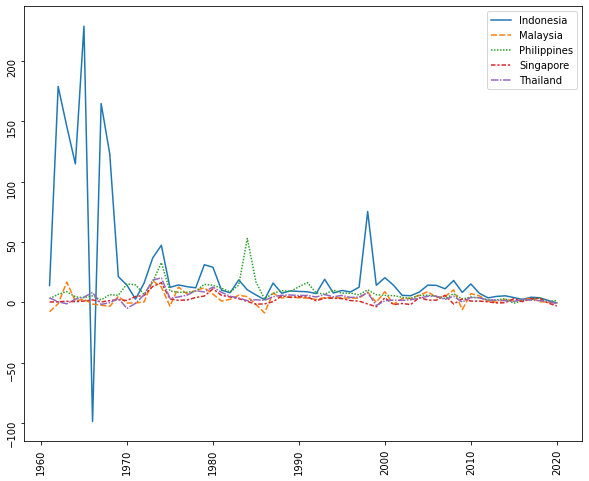

In [46]:
fig, ax = plt.subplots(figsize = (10, 8))

sns.lineplot(data=inflation)
ax.tick_params(rotation = 90)

fig.savefig('pictures/inflation1960-2021.png')

In [47]:
inflation_normal = inflation.loc['1970':]

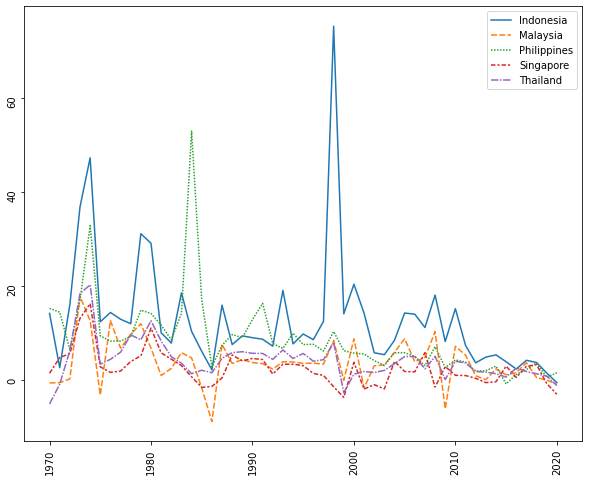

In [49]:
fig, ax = plt.subplots(figsize = (10, 8))

sns.lineplot(data=inflation_normal)
ax.tick_params(rotation = 90)

fig.savefig('pictures/inflation1970-2021.png')

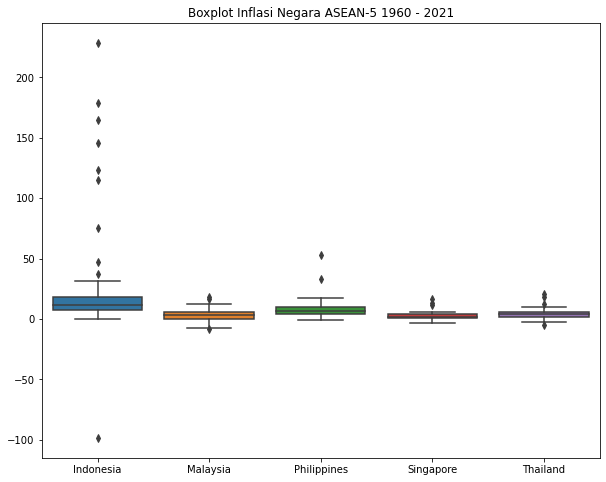

In [51]:
fig, ax = plt.subplots(figsize = (10, 8))

sns.boxplot(data=inflation)

ax.set_title('Boxplot Inflasi Negara ASEAN-5 1960 - 2021')
ax.set_xlabel('')

fig.savefig('pictures/inflation-boxplot1960-2021.png')

In [29]:
for i in ASEAN5:
    print(f'Interquartile {i} : {inflation[i].quantile(q = 0.75) - inflation[i].quantile(q = 0.25) }')

Interquartile Indonesia : 11.251005408615395
Interquartile Malaysia : 5.785669121902785
Interquartile Singapore : 3.4377852123312893
Interquartile Thailand : 4.139974930543477
Interquartile Philippines : 5.697155501456928


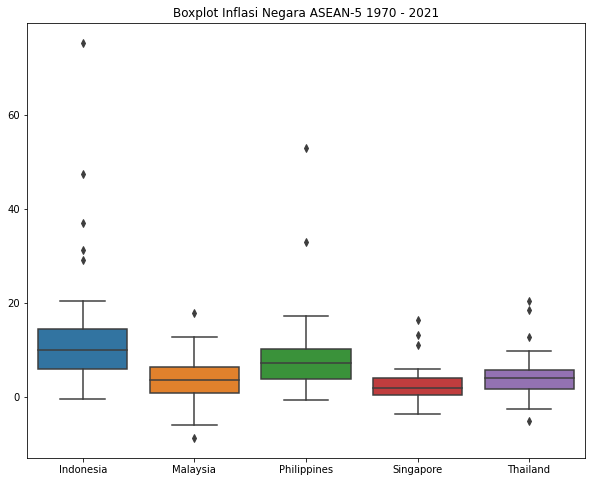

In [52]:
fig, ax = plt.subplots(figsize = (10, 8))

sns.boxplot(data=inflation_normal)

ax.set_title('Boxplot Inflasi Negara ASEAN-5 1970 - 2021')
ax.set_xlabel('')

fig.savefig('pictures/inflation-boxplot1970-2021.png')

In [53]:
for i in ASEAN5:
    print(f'Interquartile {i} : {inflation_normal[i].quantile(q = 0.75) - inflation_normal[i].quantile(q = 0.25) }')

Interquartile Indonesia : 8.350583150582125
Interquartile Malaysia : 5.624871041423183
Interquartile Singapore : 3.6150353508487516
Interquartile Thailand : 4.025250997713025
Interquartile Philippines : 6.40322063068572


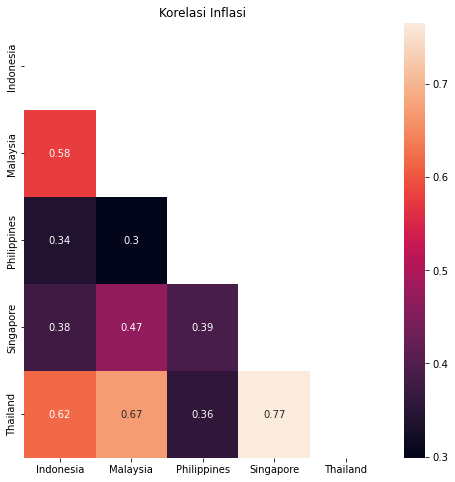

In [60]:
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(data = inflation_normal.corr(), annot=True, mask = np.triu(inflation_normal.corr()))
ax.set_title('Korelasi Inflasi')

fig.savefig('pictures/inflation-heatmap.png')